In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import libpysal

In [6]:
us_income = pd.read_csv(libpysal.examples.get_path('usjoin.csv'))[['STATE_FIPS', '2009']]
us_income_shape = gpd.read_file(libpysal.examples.get_path('us48.shp'))
us_income_shape['STATE_FIPS'] = us_income_shape.STATE_FIPS.astype(int)
mergedDataFrame = us_income_shape.merge(us_income, on='STATE_FIPS')

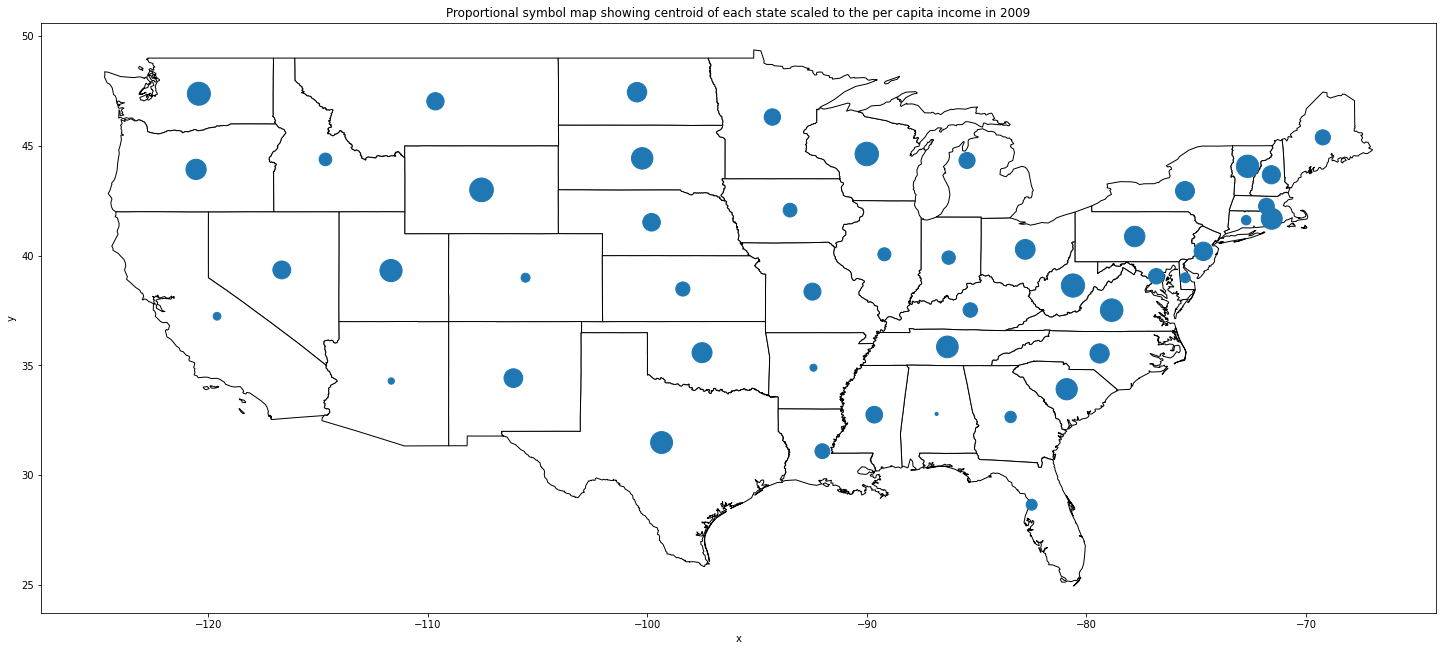

In [7]:
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.
us_income_another = pd.read_csv(libpysal.examples.get_path('usjoin.csv'))[['STATE_FIPS', '2009']]
us_income_shape_another = gpd.read_file(libpysal.examples.get_path('us48.shp'))
us_income_shape_another['STATE_FIPS'] = us_income_shape_another.STATE_FIPS.astype(int)
mergedDataFrame_another = us_income_shape_another.merge(us_income, on='STATE_FIPS')
mergedDataFrame_another['centroid_column'] = mergedDataFrame_another.centroid
centroids = list(mergedDataFrame_another['centroid_column'])
df = pd.DataFrame({'y': [centroids[i].y for i in range(len(centroids))], 'x': [centroids[i].x for i in range(len(centroids))], 'data': mergedDataFrame_another['STATE_FIPS']})
base = mergedDataFrame.plot(color='white', edgecolor='black', figsize=(25, 15), legend=True)
ax = df.plot(kind='scatter', x='x', y='y',s=df['data']*10,ax=base)
ax.set_title("Proportional symbol map showing centroid of each state scaled to the per capita income in 2009")
plt.show()